In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
with open("data/8_data.txt") as f:
    data = f.readline()
data = np.array([int(x) for x in data])

In [3]:
height = 6
width = 25
data_length = len(data)
window_width = data_length // (height* width)
layers = np.split(data, window_width)

In [4]:
layer_idx = 0
num_zero_count = 9999

final_image = 2 * np.ones((height, width), dtype=int)

for idx, layer in enumerate(layers):
    num_zeros = np.count_nonzero(layer == 0)
    
    layer = layer.reshape(height, width)
    final_image = np.where(final_image == 2, layer, final_image)

    if num_zeros < num_zero_count:
        layer_idx = idx
        num_zero_count = num_zeros

layer = layers[layer_idx]
num_ones = np.count_nonzero(layer == 1)
num_twos = np.count_nonzero(layer == 2)
ans_1 = num_ones * num_twos
ans_1

1548

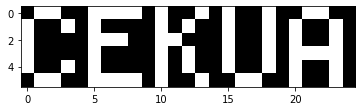

In [5]:
fig, ax = plt.subplots()
cmap = colors.ListedColormap(['black', 'white', 'white'])
ax.imshow(final_image, cmap=cmap)